# Handling missing values

Missing Value Treatment in Python – Missing values are usually represented in the form of Nan or null or None in the dataset.

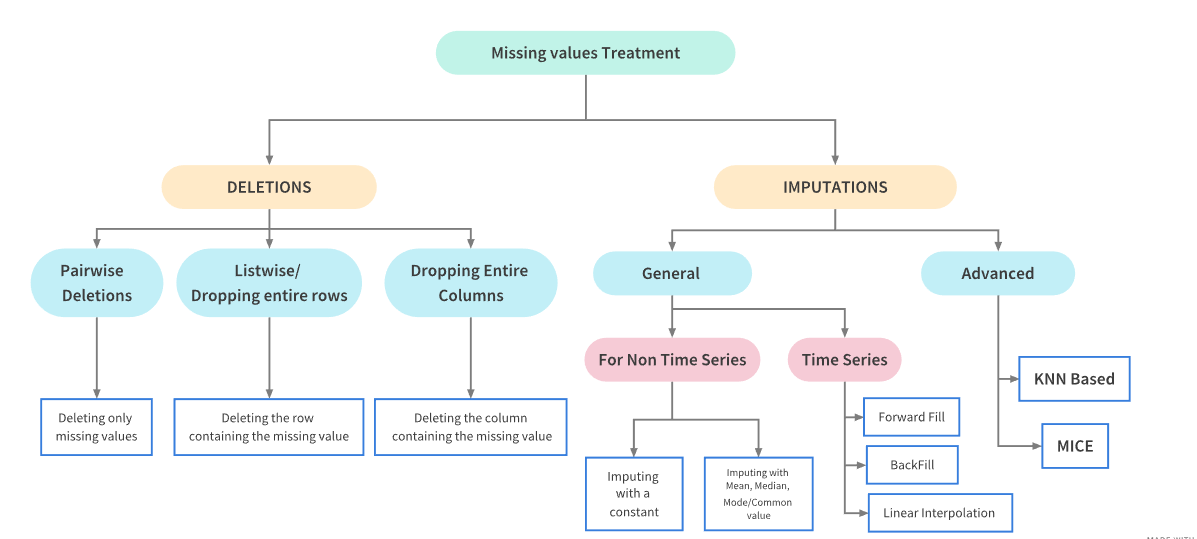

[kaggle]

## Detecting Missing values

In [1]:
import numpy as np
import pandas as pd
tdf=pd.read_csv("../content/titanic.csv")
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**info() - function**

In [2]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
mask = tdf.isnull()
total = mask.sum()
per = 100*mask.mean()

"""
- .concat is used to concatenate the two dataframes
- If axis=1, then the two dataframes are concatenated column-wise. If axis=0, then they are concatenated row-wise.
- keys is used to give the column names to the dataframes
"""
missing_data = pd.concat([total, per], axis=1,keys=['missing value', 'percentage'])

#inplace=True means that the changes are saved to the df right away (the df is modified)
missing_data.sort_values(by='percentage', ascending=False, inplace=True)
missing_data

,missing value,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


**Working with missing data**

In [5]:
tdf.Age.mean()

np.float64(29.69911764705882)

In [6]:
# Skip the missing values
tdf.Age.sum()

np.float64(21205.17)

In [7]:
# Error because of missing values
sum(tdf.Age)

nan

## Dropping missing values

In [8]:
df=tdf.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


**Missing values in a column**

In [9]:
df1=tdf.dropna(axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


**Missing values in a row**

In [10]:
df2=tdf.dropna(axis=0) #default
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


## Detecting missing data visually using Missingno library

Missingno library offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.

In [11]:
import missingno as msno
# mask.any() returns a Panda Series with True for columns with missing values and False for columns without missing values
# in this case, .any(axis=0) (default) checks the columns 
col_with_missing_val = tdf.columns[mask.any()].tolist()
col_with_missing_val

['Age', 'Cabin', 'Embarked']

**Matrix Chart**

The matrix chart provides a colored fill for each column. When data is present, the chart is shaded in gray; for missing data, the chart is displayed in white.

<Axes: >

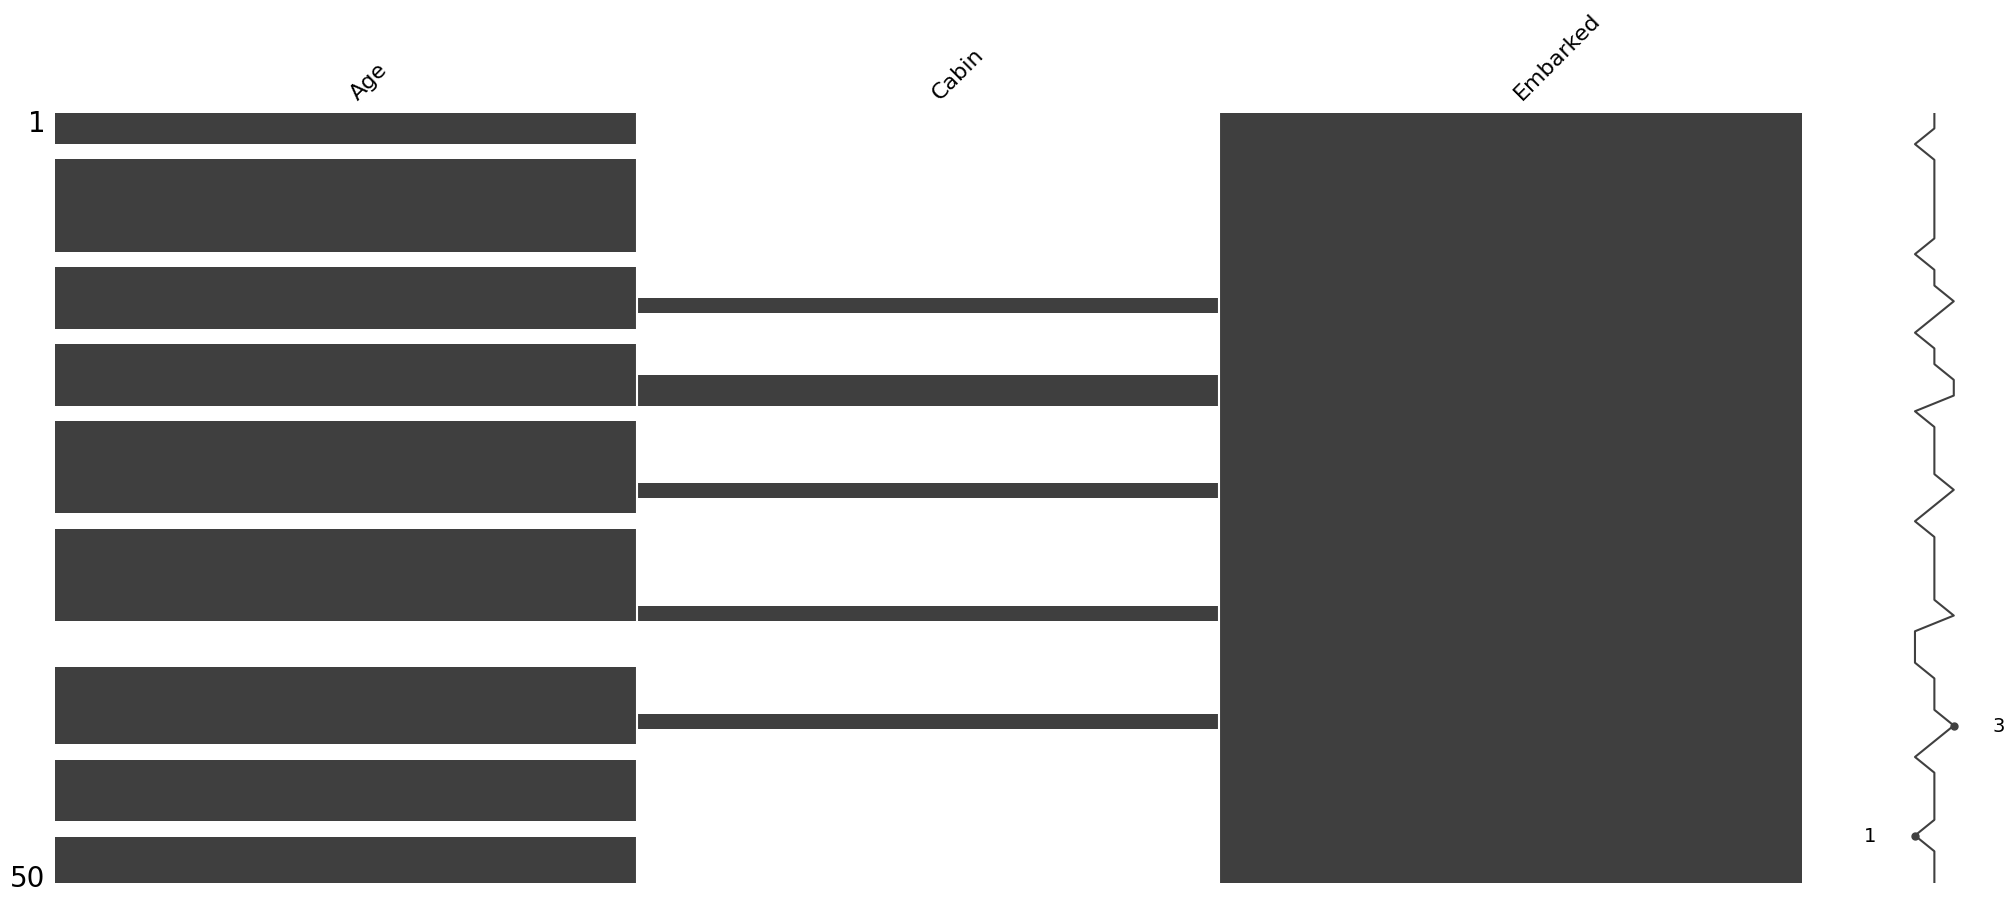

In [12]:
msno.matrix(tdf[col_with_missing_val].sample(50))

In [13]:
small = pd.DataFrame({
    'col1': [1, 2, np.nan, 4, 5],
    'col2': [np.nan, 7, 8, 9, 10],
    'col3': [np.nan, 12, 13, 2, 15]
})
small

,col1,col2,col3
0,1.0,NaN,NaN
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,9.0,2.0
4,5.0,10.0,15.0


<Axes: >

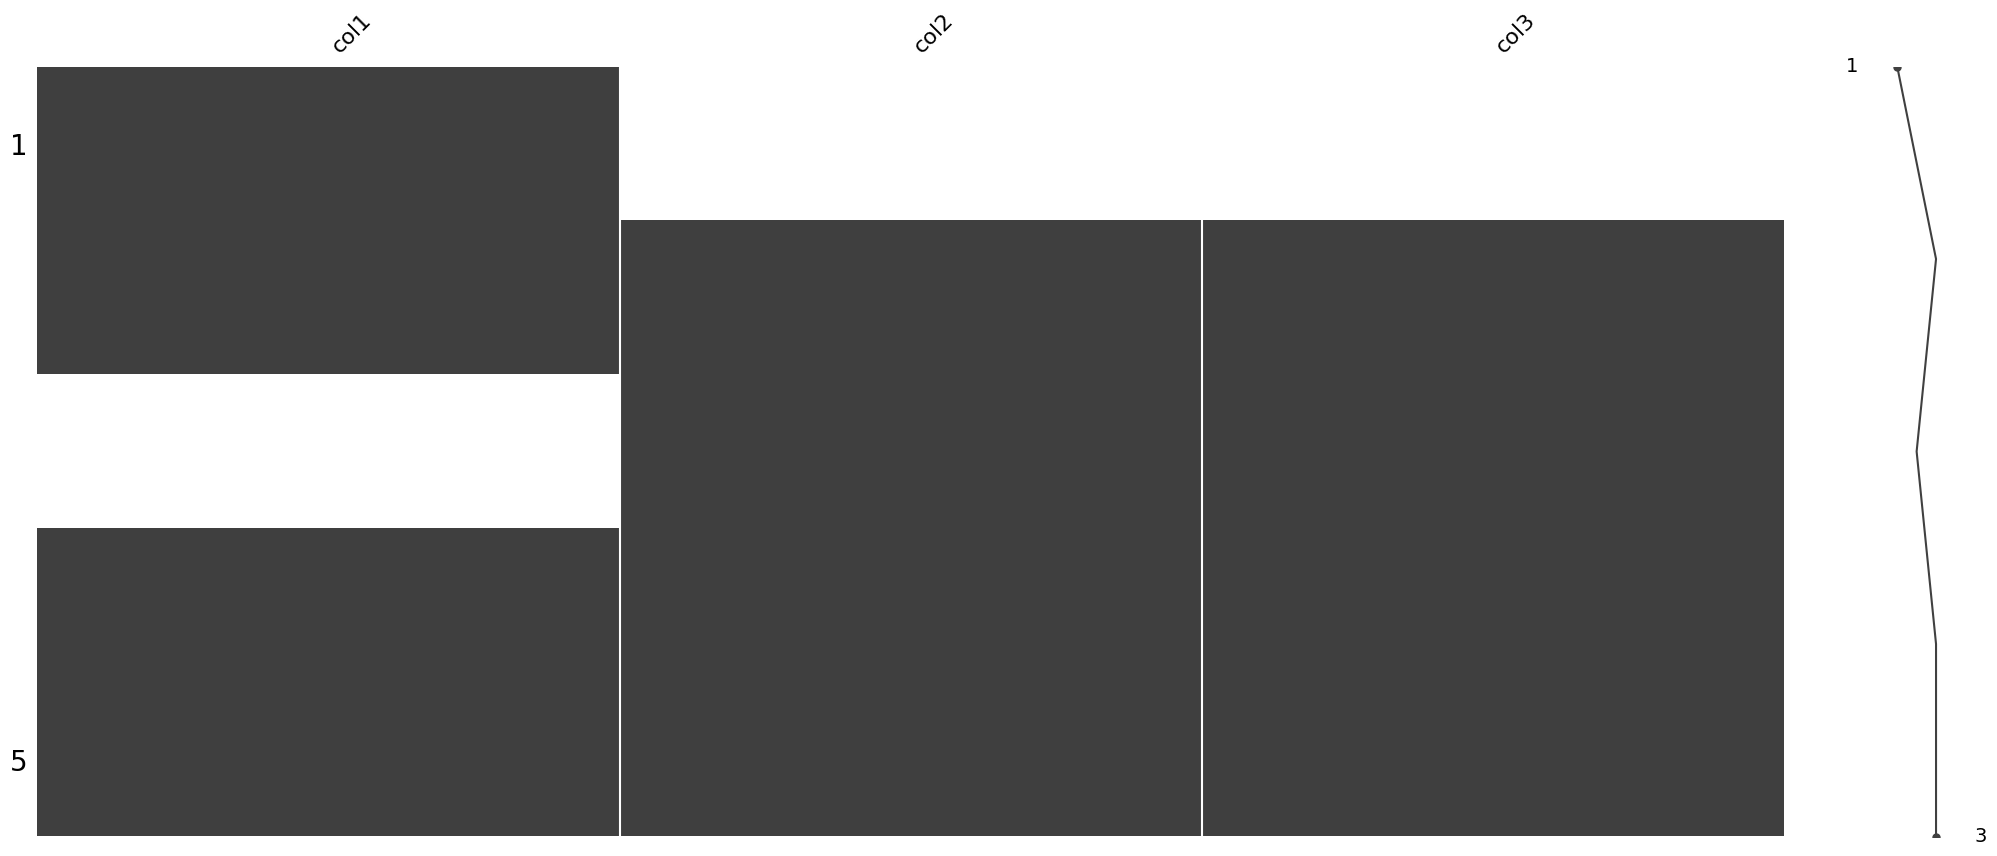

In [14]:
msno.matrix(small)

In [15]:
weather=pd.read_csv("http://rattle.togaware.com/weather.csv")
weather.info()
mask = weather.isnull()
total = mask.sum()
per = 100*mask.mean()
missing_data = pd.concat([total, per], axis=1,keys=['ile braków', 'procentowo'])
missing_data.sort_values(by='procentowo', ascending=False,inplace=True)
missing_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Location       365 non-null    object 
 2   MinTemp        365 non-null    float64
 3   MaxTemp        365 non-null    float64
 4   Rainfall       363 non-null    float64
 5   Evaporation    0 non-null      float64
 6   Sunshine       0 non-null      float64
 7   WindGustDir    361 non-null    object 
 8   WindGustSpeed  361 non-null    float64
 9   WindDir9am     313 non-null    object 
 10  WindDir3pm     364 non-null    object 
 11  WindSpeed9am   365 non-null    int64  
 12  WindSpeed3pm   365 non-null    int64  
 13  Humidity9am    365 non-null    int64  
 14  Humidity3pm    365 non-null    int64  
 15  Pressure9am    365 non-null    float64
 16  Pressure3pm    365 non-null    float64
 17  Cloud9am       226 non-null    float64
 18  Cloud3pm  

,ile braków,procentowo
Sunshine,365,100.000000
Evaporation,365,100.000000
Cloud3pm,172,47.123288
Cloud9am,139,38.082192
WindDir9am,52,14.246575
WindGustSpeed,4,1.095890
WindGustDir,4,1.095890
Rainfall,2,0.547945
RainToday,2,0.547945
RISK_MM,2,0.547945


**Bar Chart**

A bar chart provides a simple graph in which each bar represents a column in a data frame. The height of the bar indicates how complete the column is, i.e. how many values are non-empty.

<Axes: >

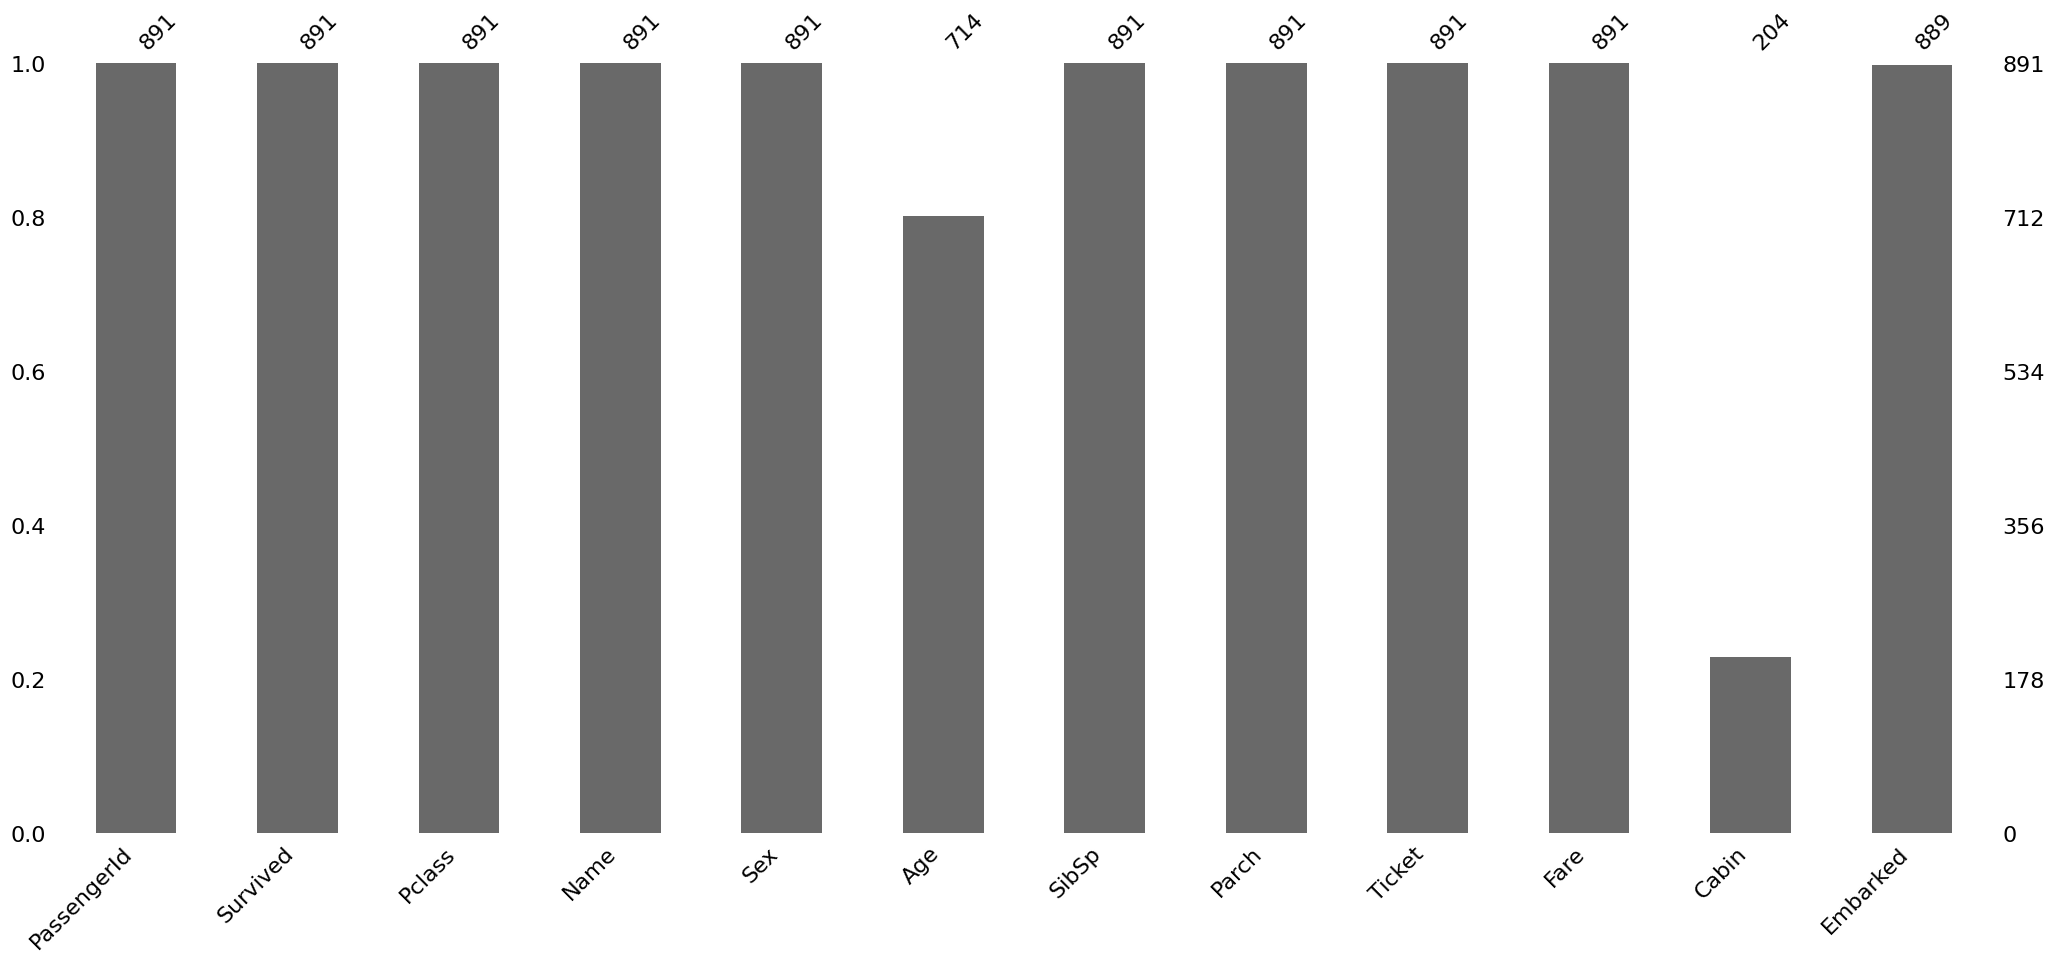

In [16]:
msno.bar(tdf)

**HeatMap**

The heat map is used to identify the correlation of missing values between each column. In other words, it can be used to determine whether there is a relationship in data gaps between each column.

Values close to positive 1 indicate that data gaps in one column are correlated with data gaps in another column.

Values close to - 1 indicate that data gaps in one column are correlated oppositely with data gaps in another column. In other words, when there are zero values in one column, there are data in the other column, and vice versa.

<Axes: >

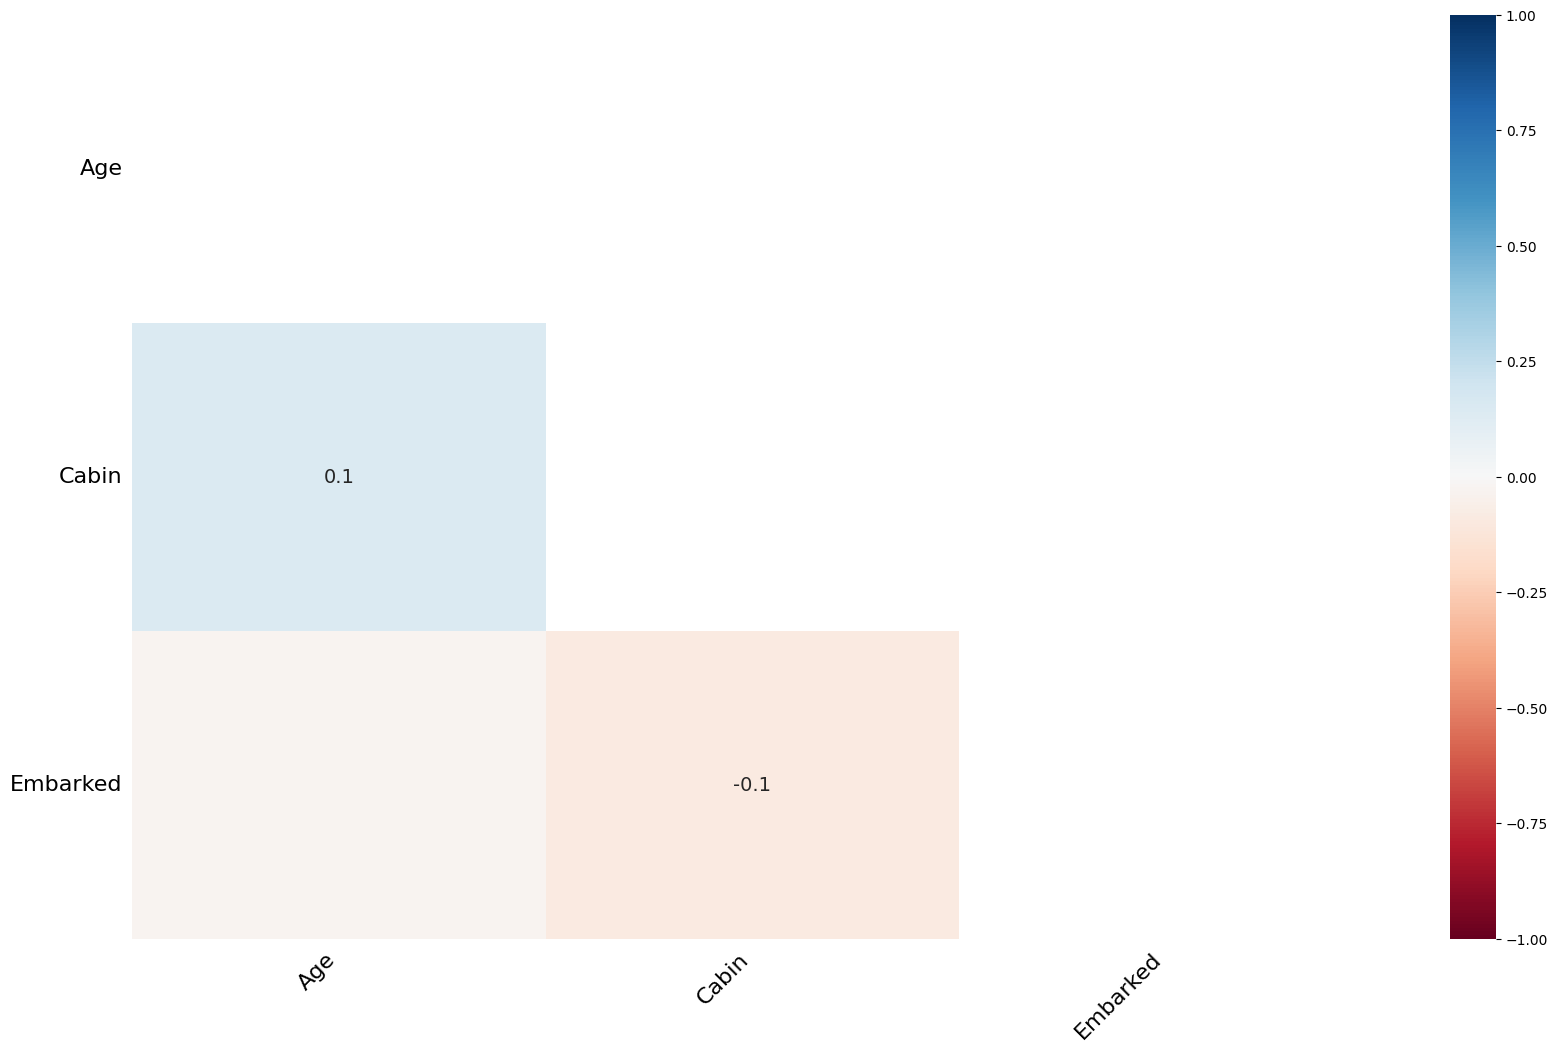

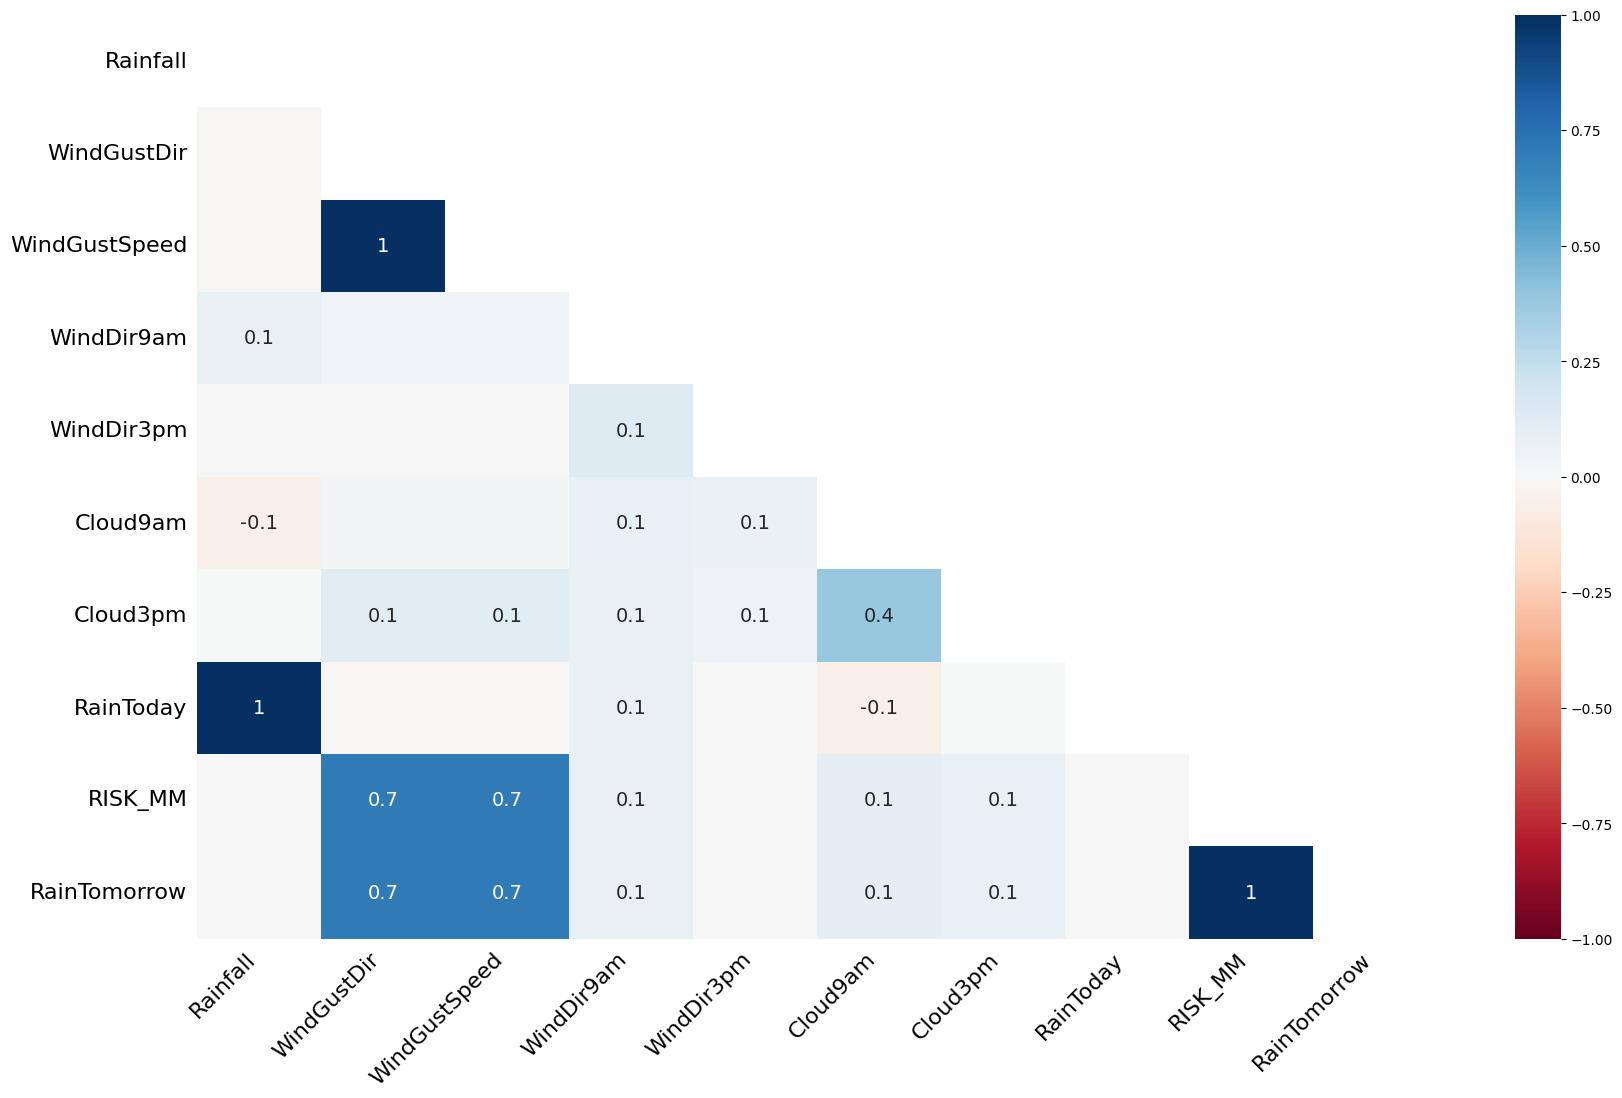

In [17]:
msno.heatmap(tdf)
msno.heatmap(weather)

**Dendrogram**

The dendrogram provides a tree-like graph generated through hierarchical clustering and groups columns that have strong correlations in missing data.

<Axes: >

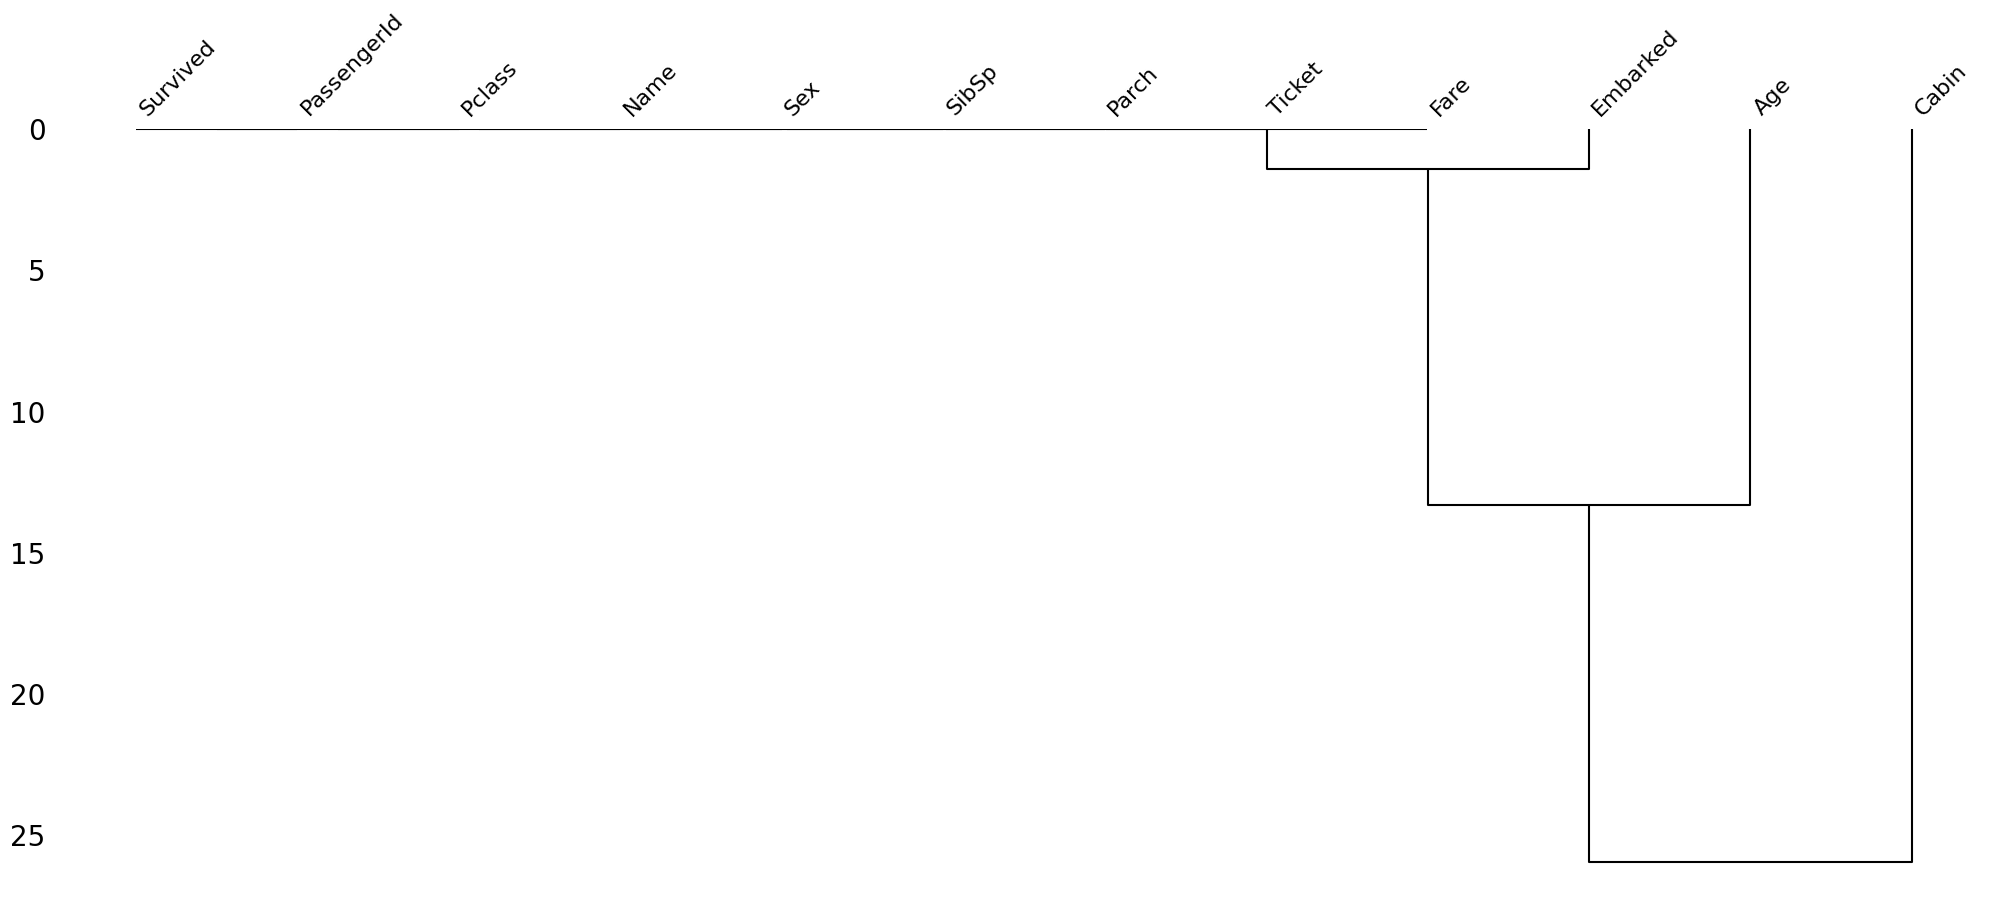

In [18]:
msno.dendrogram(tdf)

<Axes: >

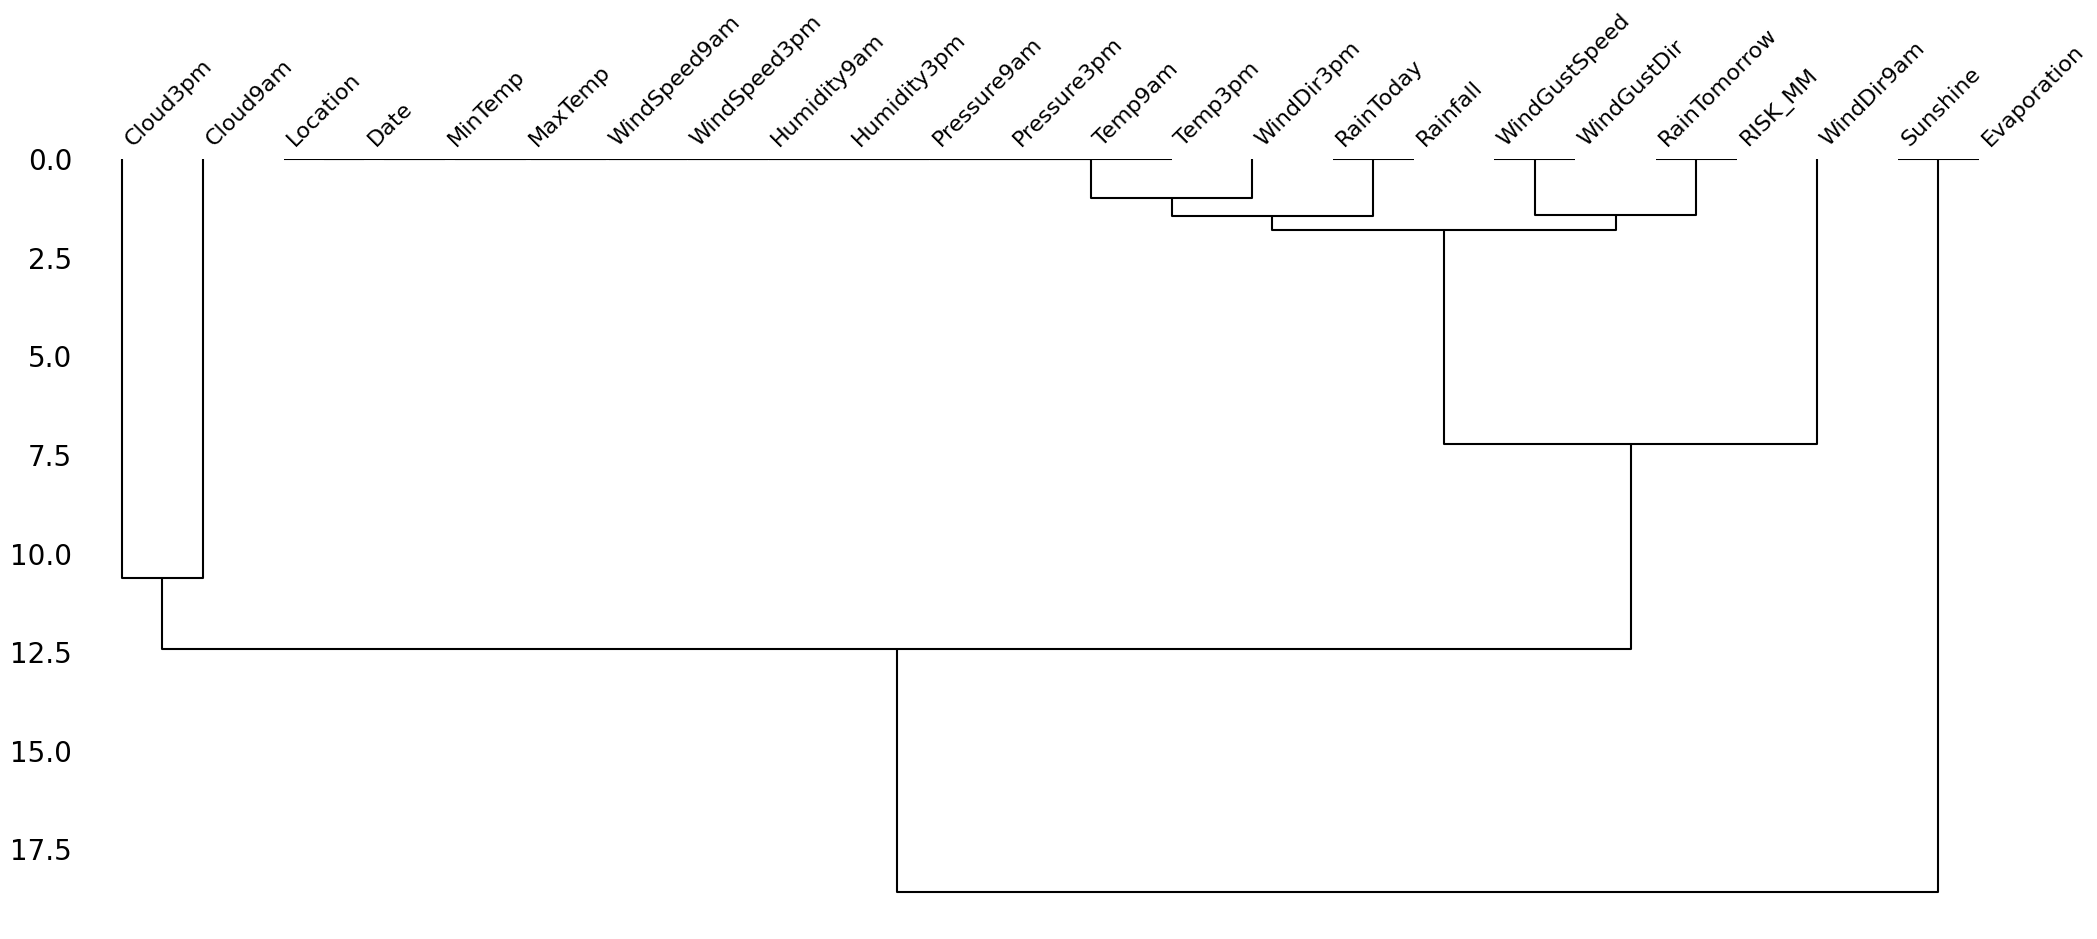

In [19]:
msno.dendrogram(weather)

<Axes: >

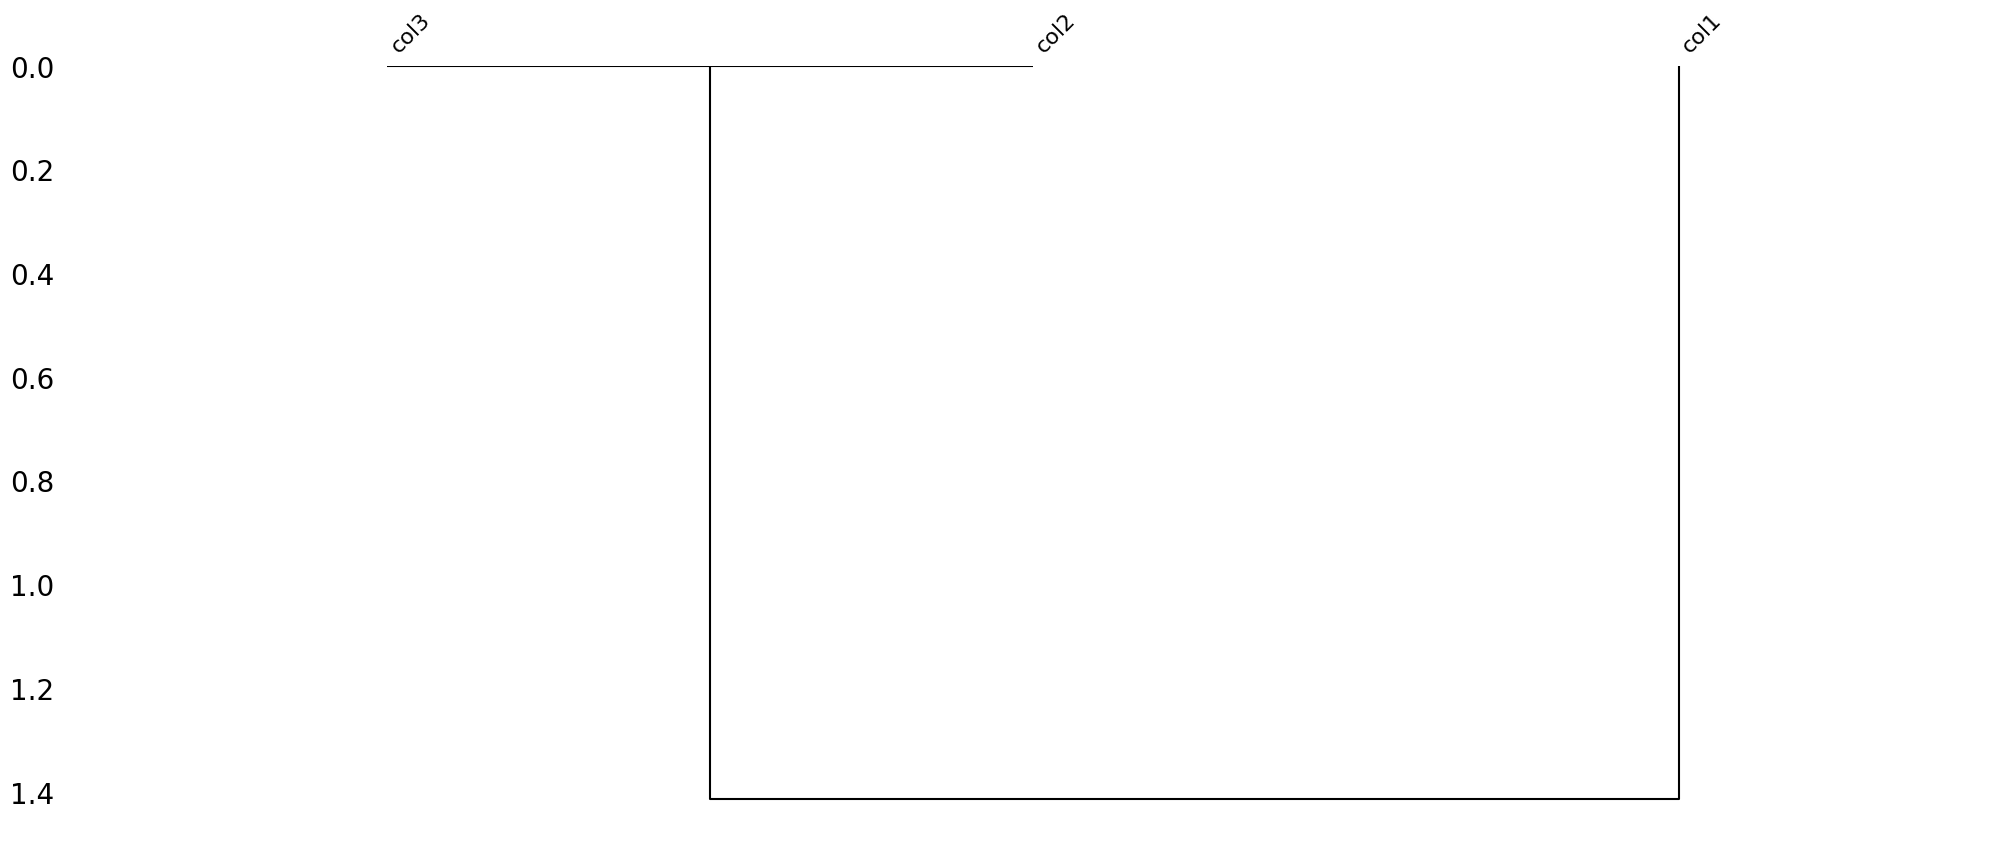

In [20]:
msno.dendrogram(small)

## Filling in a missing value

**fillna()**  

The fillna() function takes one value that we want to fill at the missing place. We can fill in the missing  values using the mean, median, and mode

In [21]:
updated_df = tdf.copy(deep=True)
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'Number')

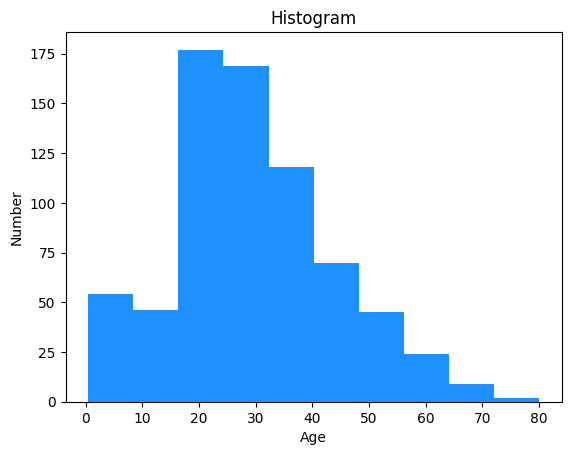

In [22]:
import matplotlib.pyplot as plt
plt.hist(tdf.Age, color = 'dodgerblue')
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

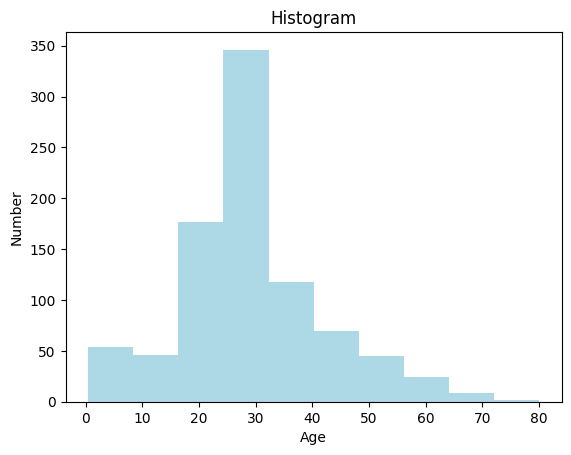

In [23]:
plt.hist(updated_df.Age, color = 'lightblue')
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Number')

In [24]:
updated_df['Cabin']=updated_df['Cabin'].fillna("b.d.")
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
updated_df[updated_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**sklearn**

[Scikit-learn](https://scikit-learn.org/stable/index.html#)

Scikit-learn called sklearn is an open source library dedicated to machine learning for the Python language. It includes various data mining algorithms. In addition, it also includes data cleaning tools.

SimpleImputer is a class in the sklearn.impute module that can be used to replace missing values in a dataset, using various input strategies. SimpleImputer supports numeric data and categorical data represented as strings. The default strategy is “mean,” which replaces missing values with the average of the column with the missing data. Other options include “most_frequent” (which replaces missing values with the most frequent value in the column) and “constant” (which replaces missing values with a constant value) and “median.”

SimpleImputer can also be used to impute multiple columns at once by passing a list of column names. SimpleImputer will then replace missing values in all specified columns.

A disadvantage of the class is the need to convert the results to a data frame, due to the fact that the method returns an array of numpy.

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

In [27]:
imputer

SimpleImputer()

In [28]:
imputer.fit(tdf[['Age']])

SimpleImputer()

In [29]:
tdf['Age']=imputer.transform(tdf[['Age']]) # =tdf[['Age']]=imputer.fit_transform(tdf[['Age']])
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
